In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [2]:
# # Tạo dữ liệu 

# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24],
#     'y': [39, 36, 30, 52, 54, 46, 55]
# })
# df.T

In [3]:
# Tạo dữ liệu 

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 40 ,62, 14, 74, 34, 42, 55, 7],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 60, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 33, 55, 25, 33, 19, 17, 40, 17]
})
df.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
x,12,20,28,18,29,33,24,45,45,52,...,69,72,40,62,14,74,34,42,55,7
y,39,36,30,52,54,46,55,59,60,70,...,7,24,33,55,25,33,19,17,40,17


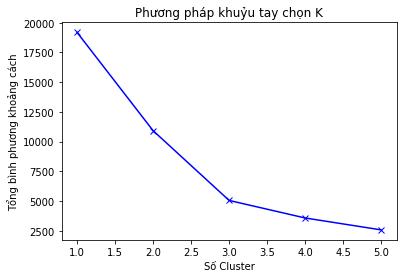

In [4]:
K = range(1,6)
Sum_of_squared_distances = []
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Số Cluster')
plt.ylabel('Tổng bình phương khoảng cách')
plt.title('Phương pháp khuỷu tay chọn K')
plt.show()

In [5]:
# Số cluster 
k = 5

In [6]:
# Tạo màu cho các center 
colors = cm.rainbow(np.linspace(0, 1, k))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [7]:
# Chọn ngẫu nhiên K điểm center từ data
def create_center(k):
    index_center = []

    # Vị trí của center trong data
    for i in range(k):
        value = np.random.randint(0, len(df))
        if value in index_center:
            value = np.random.randint(0, len(df))
        index_center.append(value)
    print(index_center)
    centroids = {
        j+1: [df['x'][index_center[j]], df['y'][index_center[j]]]
        for j in range(k)
    }
    #print(centroids)
    return centroids

In [8]:
centroids = create_center(k)
centroids

[11, 6, 9, 23]


{1: [52, 63], 2: [24, 55], 3: [52, 70], 4: [34, 19]}

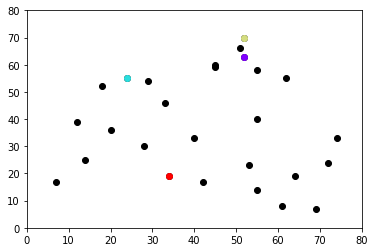

In [9]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color='k')
# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#ax.legend(fontsize='small')

### Lí thuyết
- Công thức tính khoảng cách 2 giữa 2 điểm $A(x_{1}, y_{2}), B(x_{2}, y_{2})$ 
    - distance_AB = $\sqrt{(x_{1} - x_{2})^2 + (y_{1} -y_{2})^2}$ 

In [10]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2
            )  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    df['color'] = df['closest'].map(lambda x: colors[x-1]) # Set màu tương tự center
    return df
    
df = assigment(df, centroids)
print(df)

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        46.647615        20.000000        50.606324   
1   20  36        41.868843        19.416488        46.690470   
2   28  30        40.804412        25.317978        46.647615   
3   18  52        35.735137         6.708204        38.470768   
4   29  54        24.698178         5.099020        28.017851   
5   33  46        25.495098        12.727922        30.610456   
6   24  55        29.120440         0.000000        31.764760   
7   45  59         8.062258        21.377558        13.038405   
8   45  60         7.615773        21.587033        12.206556   
9   52  70         7.000000        31.764760         0.000000   
10  51  66         3.162278        29.154759         4.123106   
11  52  63         0.000000        29.120440         7.000000   
12  55  58         5.830952        31.144823        12.369317   
13  53  23        40.012498        43.185646        47.010637   
14  55  14        49.0917

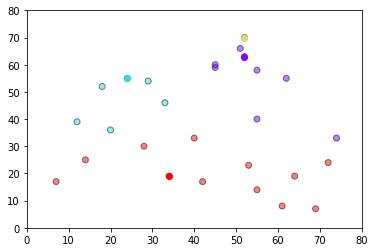

In [11]:
# Hàm vẽ
def plot_show():
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
plot_show()

In [12]:
import copy

old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)

{1: [54.875, 54.25], 2: [22.666666666666668, 47.0], 3: [52.0, 70.0], 4: [44.916666666666664, 19.666666666666668]}


     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        45.506353        13.333333        50.606324   
1   20  36        39.361506        11.318618        46.690470   
2   28  30        36.198455        17.816971        46.647615   
3   18  52        36.943580         6.839428        38.470768   
4   29  54        25.876208         9.439868        28.017851   
5   33  46        23.379010        10.381608        30.610456   
6   24  55        30.884108         8.110350        31.764760   
7   45  59        10.958016        25.353062        13.038405   
8   45  60        11.427079        25.841397        12.206556   
9   52  70        16.010251        37.275252         0.000000   
10  51  66        12.372474        34.114187         4.123106   
11  52  63         9.210219        33.413238         7.000000   
12  55  58         3.752083        34.153249        12.369317   
13  53  23        31.306199        38.679596        47.010637   
14  55  14        40.2501

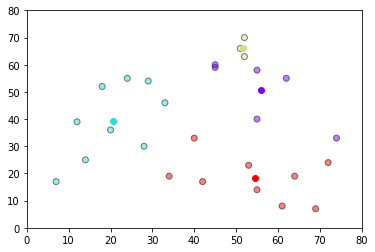

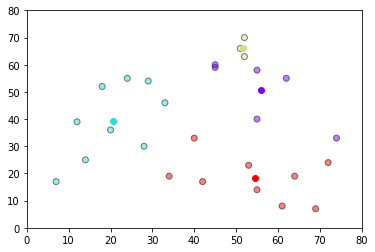

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        45.563448         8.562047        48.172145   
1   20  36        38.936201         3.379313        43.850757   
2   28  30        34.900255        11.938629        43.361529   
3   18  52        38.017905        12.921893        36.590831   
4   29  54        27.185065        16.923940        25.804823   
5   33  46        23.502364        14.117671        27.602335   
6   24  55        32.270127        16.040843        29.897975   
7   45  59        13.700162        31.373693         9.910712   
8   45  60        14.318791        32.010029         9.195409   
9   52  70        19.579610        43.922631         3.681787   
10  51  66        15.969589        40.471908         0.745356   
11  52  63        12.807333        39.355612         3.349959   
12  55  58         7.236098        39.177343         8.975275   
13  53  23        27.994543        36.323818        43.353841   
14  55  14        36.8469

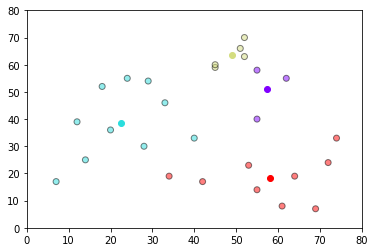

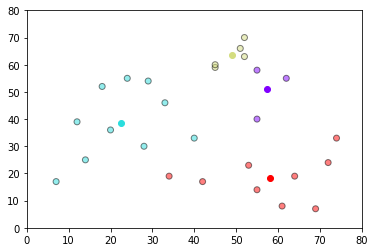

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        46.894681        10.504285        44.431520   
1   20  36        40.234038         3.679674        40.034485   
2   28  30        36.075538        10.292716        39.622721   
3   18  52        39.346043        14.040655        33.099245   
4   29  54        28.491714        16.623477        22.184679   
5   33  46        24.841721        12.788276        23.785710   
6   24  55        33.572475        16.368873        26.437852   
7   45  59        14.700718        30.304125         6.095900   
8   45  60        15.267977        30.982899         5.381450   
9   52  70        19.734347        43.010929         7.068239   
10  51  66        16.282233        39.465681         3.124100   
11  52  63        13.131810        38.219628         3.059412   
12  55  58         7.378648        37.798677         8.207314   
13  53  23        28.333333        34.303644        40.796568   
14  55  14        37.0735

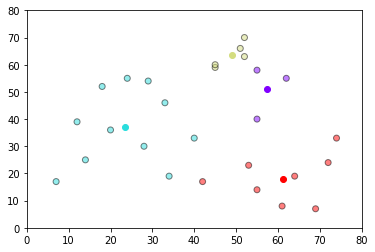

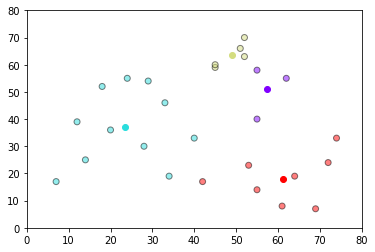

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        46.894681        11.733261        44.431520   
1   20  36        40.234038         3.660149        40.034485   
2   28  30        36.075538         8.220615        39.622721   
3   18  52        39.346043        16.077550        33.099245   
4   29  54        28.491714        17.940213        22.184679   
5   33  46        24.841721        13.116137        23.785710   
6   24  55        33.572475        18.096619        26.437852   
7   45  59        14.700718        30.794574         6.095900   
8   45  60        15.267977        31.519638         5.381450   
9   52  70        19.734347        43.642519         7.068239   
10  51  66        16.282233        40.000413         3.124100   
11  52  63        13.131810        38.605656         3.059412   
12  55  58         7.378648        37.871030         8.207314   
13  53  23        28.333333        32.573502        40.796568   
14  55  14        37.0735

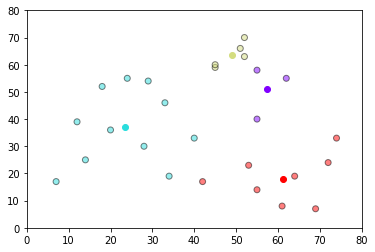

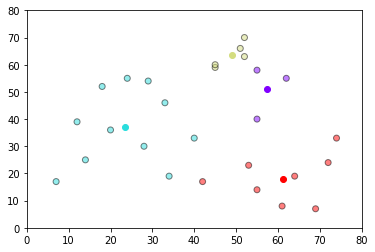

In [13]:
# Chạy K_means_clustering => điều kiện dừng khi tọa độ old_center = new_center
while old_centroids != centroids:
    df = assigment(df, centroids)
    print(df)
    old_centroids = copy.deepcopy(centroids)
    centroids = update(centroids)
    print(centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = (centroids[i][0]) - old_centroids[i][0]*0.75
        dy = (centroids[i][1]) - old_centroids[i][1]*0.75
    plt.show()

----
# K Means Clutering trong dữ liệu đa chiều

In [14]:
d = 3 # số chiều
df = {
    i+1 : np.random.randint(0,100, size=30)
    for i in range(d)
}
df = pd.DataFrame(df)
df.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1,10,45,64,24,92,78,27,52,1,37,...,56,39,75,36,71,36,52,56,17,95
2,64,12,60,90,22,64,67,31,34,17,...,49,49,35,50,85,0,61,71,23,77
3,16,26,27,75,33,2,70,13,83,37,...,53,9,4,4,56,67,9,76,74,49


In [15]:
# Số cluster 
k = 3

In [16]:
def center_array(D,row):
    x = []
    for d in range(D): x.append(df[d+1][row])
    return x

In [17]:
def create_center(k):
    r =  np.random.randint(0, len(df), size = k)
    print(r)
    centroids = {
        i+1: center_array(d,r[i])
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [18]:
centroids = create_center(k)
centroids

[3 7 2]


{1: [24, 90, 75], 2: [52, 31, 13], 3: [64, 60, 27]}

In [19]:
def distance_center(cluter):
    distance = 0
    for i in range(d-1):
        distance = distance + (df[i+1] - centroids[cluter][i])**2
    return np.sqrt(distance)

In [20]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            distance_center(i)  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    return df   
df = assigment(df, centroids)
df

,1,2,3,distance_from_1,distance_from_2,distance_from_3,closest
0,10,64,16,29.529646,53.413481,54.147945,1
1,45,12,26,80.777472,20.248457,51.623638,2
2,64,60,27,50.000000,31.384710,0.000000,3
3,24,90,75,0.000000,65.306967,50.000000,1
4,92,22,33,96.166522,41.000000,47.201695,2
5,78,64,2,59.933296,42.011903,14.560220,3
6,27,67,70,23.194827,43.829214,37.656341,1
7,52,31,13,65.306967,0.000000,31.384710,2
8,1,34,83,60.539243,51.088159,68.154237,2
9,37,17,37,74.148500,20.518285,50.774009,2


In [21]:
def new_center(cluter,d):
    for i in range(d-1):centroids[cluter][i+1] = np.mean(df[df['closest'] == cluter][i+1])
    return

In [22]:
import copy

old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for i in centroids.keys():
        new_center(i,d)
    return k

centroids = update(centroids)
centroids

{1: [24, 26.0, 80.6],
 2: [52, 43.625, 23.0],
 3: [64, 64.33333333333333, 68.33333333333333]}

In [23]:
n = 0
while old_centroids != centroids:
    n = n + 1 
    df = assigment(df, centroids) # tính khoảng cách và label các điểm dữ liệu
    old_centroids = copy.deepcopy(centroids) # copy các điểm center ra 1 tập mới
    centroids = update(centroids) # cập nhập các điểm center
n 

In [ ]:
centroids

In [ ]:
df